# Fourier shift with Lanczos smoothing filter

In [223]:
import numpy as np
from matplotlib import pyplot as plt

In [224]:
n = 50
x0 = n * 0.5
x = np.arange(n)

<StemContainer object of 3 artists>

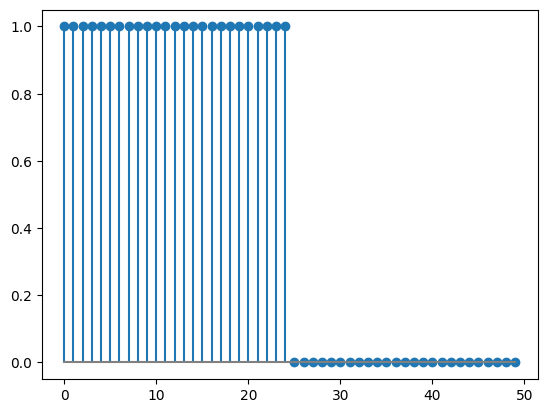

In [225]:
z = x < x0
# plt.xlim(x0 - 20, x0 + 20)
plt.stem(x,z, basefmt="gray")

In [226]:
def wavenum(i) : return (i + n // 2) % n - n // 2

In [227]:
# fractional shift
delta = 10.5
H = np.exp(-2j * wavenum(x) / n * np.pi * delta)
if n & 1:
    idx0, idx1 = n//2, 1 + n//2
    #ambiguous = np.exp(-2j * (n - 1) / n * np.pi * delta)
    print("wavenums", wavenum(idx0), wavenum(idx1))
    print("H:", H[idx0], H[idx1])
else :
    idx0 = n//2
    ambiguous = np.exp(-2j * (n//2) / n * np.pi * delta)
    print("H:", H[idx0], ambiguous)
    H[idx0] = 0.5 * (ambiguous + 1/ambiguous)
    print("new H:", H[idx0])

H: (-4.904777002955296e-16+1j) (-4.904777002955296e-16-1j)
new H: (-4.904777002955296e-16+0j)


M is  1
fs:  0.5688120979117234 -1.0237626751762921e-16
[1.         0.99896853 0.99587925 0.99074747 0.98359861 0.974468
 0.96340068 0.95045101 0.9356824  0.91916678 0.9009842  0.88122222
 0.85997535 0.83734442 0.81343589 0.78836118 0.76223587 0.73517903
 0.70731238 0.67875957 0.64964534 0.62009477 0.59023253 0.56018208
 0.53006494 0.5688121  0.53006494 0.56018208 0.59023253 0.62009477
 0.64964534 0.67875957 0.70731238 0.73517903 0.76223587 0.78836118
 0.81343589 0.83734442 0.85997535 0.88122222 0.9009842  0.91916678
 0.9356824  0.95045101 0.96340068 0.974468   0.98359861 0.99074747
 0.99587925 0.99896853]


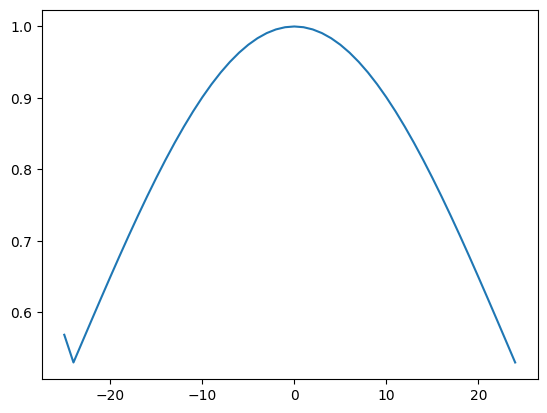

In [236]:
#lanczos smoothing
G = np.zeros(n)
M = 0
#we pick the support of the smoothing window depending on the fractional shift
mydistance = np.abs(np.mod(delta, 1) - 0.5)
if mydistance < 0.5 - 0.03125:
    M = 1
if mydistance < 0.5 - 0.0125:
    M = 2
if mydistance < 0.5 - 0.25:
    M = 3
print("M is ", M)
if M:
    for i in range(n):
        k = wavenum(i)
        a = 2 * np.pi / n * k * M
        #weighted average of (1/2 + 1/2 cos(pi / M * x))
        if True:
            if 4 * k == -n or 4 * k == n:
                G[i] += 1
            else:
                G[i] += 2 * a * np.sin(a) / (np.pi**2 - a**2)
        if True:
            if i:
                G[i] += 2 * np.sin(a) / (a)
            else:
                G[i] += 2
        G[i] *= 0.5
        if k == -n//2 :
            print("fs: ", G[i], np.sin(-a) / -a)
else :
    G = np.ones(n)
#plot frequency response
print(G)
from numpy import fft as fft
plt.plot(np.arange(n) - n//2, fft.fftshift(G))

<StemContainer object of 3 artists>

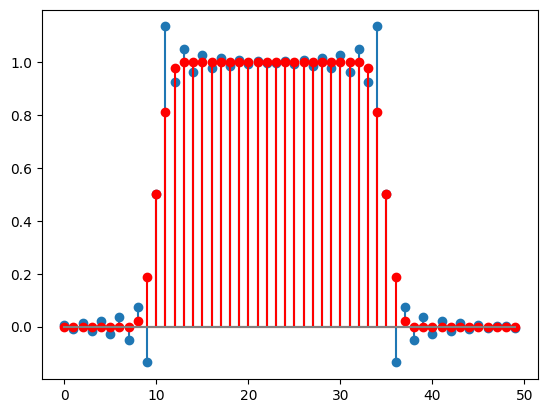

In [233]:
z_shifted = fft.ifft(H * fft.fft(z))
z_smoother = fft.ifft(G * H * fft.fft(z))
# plt.xlim([-20 + delta + x0, 20 + delta + x0])
plt.stem(x, np.real(z_shifted))
plt.stem(x, np.real(z_smoother), linefmt='r-', markerfmt='ro', basefmt="gray")

<StemContainer object of 3 artists>

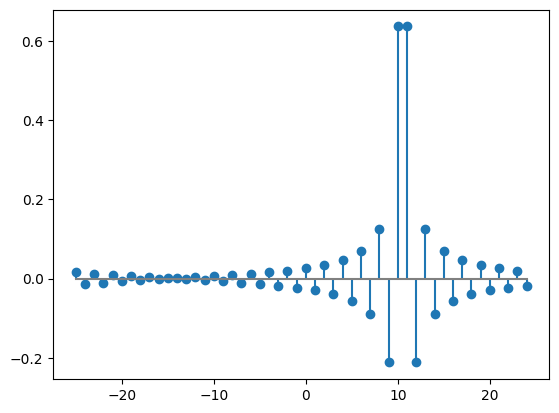

In [234]:
#show combined impulse response with shift and smoothing
impulse_response = fft.ifft(H * 1)
impulse_response_smooth = fft.ifft(H * G)
# plt.xlim([-20 + delta,20 + delta])
plt.stem(np.arange(n) - n//2, fft.fftshift(np.real(impulse_response)), basefmt="gray")

<StemContainer object of 3 artists>

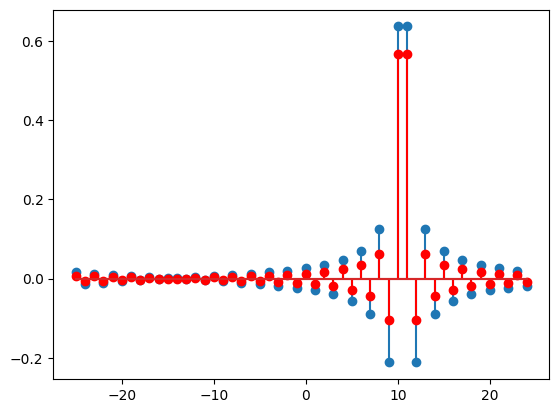

In [231]:
# plt.xlim([-20 + delta,20 + delta])
plt.stem(np.arange(n) - n//2, fft.fftshift(np.real(impulse_response)))
plt.stem(np.arange(n) - n//2, fft.fftshift(np.real(impulse_response_smooth)), linefmt='r-', markerfmt='ro')